<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Player Performance Prediction for World Cup Matches: Cricket Code Champions Hack</h1>
</div>

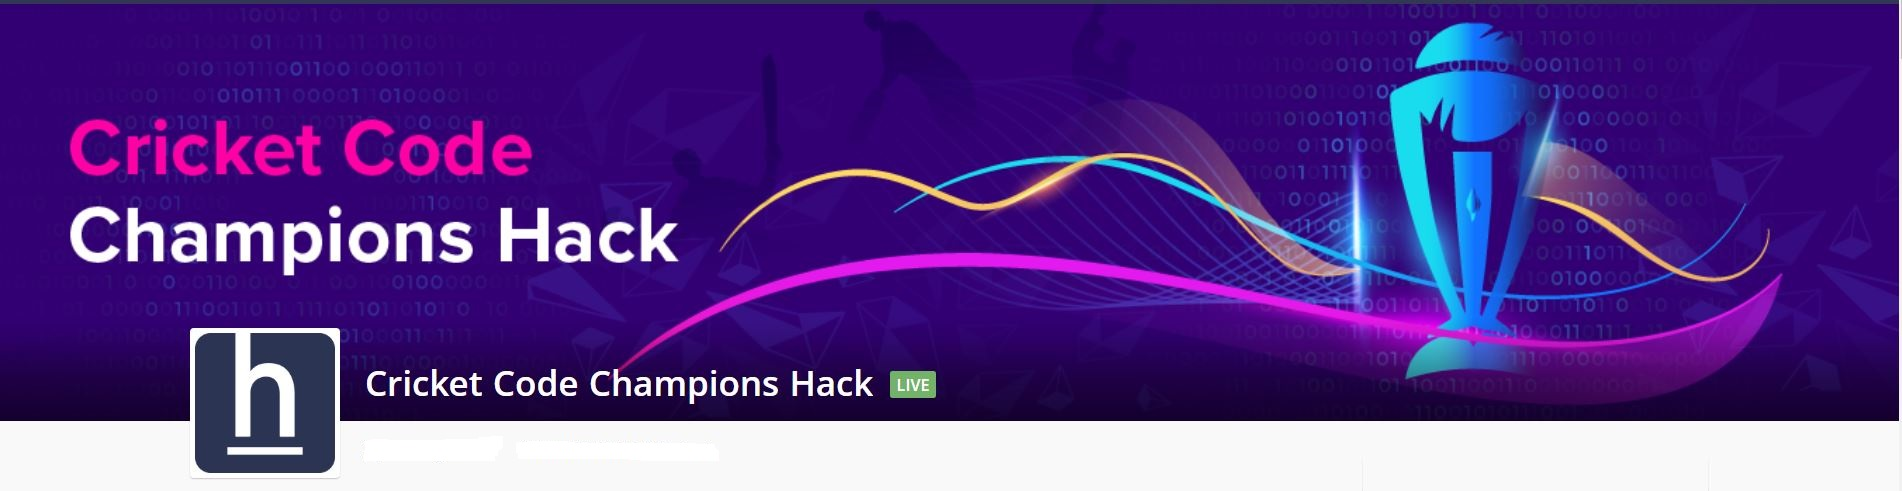

**Author:-** Aniket B. Barphe
    
**LinkedIn Profile:-** https://www.linkedin.com/in/aniiketbarphe/
        
**Platform:-** Cricket Code Champions Hack HackerEarth (01-Nov-2023 06:00 PM IST to 19-Nov-2023 11:59 PM IST)
    
**Problem Statement:-** Build a machine learning-based approach to make precise predictions regarding the runs scored and wickets taken by each player in cricket World Cup matches.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [50]:
# Data manipulation
import scipy
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os
import math

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)

# Machine learning
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Model Evaluations
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# print module versions for reproducibility
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))

NumPy version 1.21.5
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.0.1


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Match wise Historical Player Performance" data into "match_wise_data" Variable 
- Read & Load "Player Career Performance" into "player_career_performance" Variable

In [24]:
match_wise_data = pd.read_csv (r'C:\Users\PC\Pictures\HE\Cricket_Champion_Hack_Nov23\Final_Work\IND_AUS_Player-Match-Wise-Records.csv')
player_career_performance = pd.read_csv (r'C:\Users\PC\Pictures\HE\Cricket_Champion_Hack_Nov23\Final_Work\IND-AUS-Player-CAREER-DATA.csv')

#### <span style="color:red">Note: These data have undergone processing and are derived from information extracted from ESPN CricInfo, serving as the foundation for model development. The dataset's collection details can be found in the "Reference - Data Collection" section located at the end of this notebook.</span>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>ESPNCrickInfo Feature/s Definitions</h2>
</div>

### <span style="color:black">Here are the definitions for the features available in loaded data:-</span>

#### <span style="color:orange">a) **PLAYER_ID**:-</span> 

Assigned numerical identification to players in the dataset by me.

#### <span style="color:orange">b) **PLAYER_NAME**:-</span> 

Name of the player.

#### <span style="color:orange">c) **RUNS_SCORED**:-</span> 

Player's batting performance in terms of runs scored.

#### <span style="color:orange">d) **WICKETS**:-</span> 

Player's wicket count.

#### <span style="color:orange">e) **RUNS_CONCEDED**:-</span> 

Bowling performance in terms of runs conceded by the player.

#### <span style="color:orange">f) **ODI_Bat_NotOut**:-</span> 

Frequency of a player's innings where they were not dismissed while batting in One Day Internationals (ODIs).

#### <span style="color:orange">g) **ODI_Highest_Bat_Inning_Score**:-</span> 

The player's highest individual batting score in a One Day International (ODI) match.

#### <span style="color:orange">h) **ODI_Bat_Avg**:-</span> 

The player's One Day International (ODI) batting average.

#### <span style="color:orange">i) **ODI_Bat_SR**:-</span> 

The ODI batting strike rate of the player.

#### <span style="color:orange">j) **ODI_Hundred_Scored**:-</span> 

The count of centuries achieved by the player in One Day Internationals (ODIs).

#### <span style="color:orange">k) **ODI_Fifty_Scored**:-</span> 

The count of half-centuries achieved by the player in One Day Internationals (ODIs).

#### <span style="color:orange">l) **ODI_Boundary_Four**:-</span> 

The count of boundaries where the player scored four runs in One Day International (ODI) matches.

#### <span style="color:orange">m) **OBI_Boundary_Six**:-</span> 

The count of sixes scored by the player in One Day Internationals (ODIs).

#### <span style="color:orange">n) **ODI_Bowl_Avg**:-</span> 

The ODI Bowling Average of the Player.

#### <span style="color:orange">o) **ODI_Economy_Rate**:-</span> 

The ODI Bowler's Economy Rate.

#### <span style="color:orange">p) **ODI_Bowl_SR**:-</span> 

Player's One Day International (ODI) Bowling Strike Rate.

#### <span style="color:orange">q) **ODI_4Wt_in_Inn**:-</span> 

The frequency of a bowler taking 4 wickets in a single inning during a One Day International (ODI) match.

#### <span style="color:orange">r) **ODI_5Wt_in_Inn**:-</span> 

The count of instances where a bowler has taken 5 wickets in a single ODI inning.

#### <span style="color:orange">s) **ODI_Inn_Bat_Field**:-</span> 

In ODI (One Day International) cricket, the count of innings in which a player participated, either as a batsman or a fielder.


#### <span style="color:green">In addition to the definitions mentioned above,below are the details regarding the website from which additional player data was retrieved and the date on which this supplementary information was extracted.</span>

##### <span style="color:red">a) **Website**:- www.espncricinfo.com</span> 

##### <span style="color:red">b) **Data As On**:- <span style="color:black">30 Sept 2023</span> </span>

##### <span style="color:red">c) **Match format**:- <span style="color:black">The data specifically pertains to One-Day Internationals (ODIs).</span> </span>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Match Wise Player Data including Categorical Variable
- Statistical Insight of Player Career Performance Data including Categorical Variable
- Check Null Entries in Match Wise Player Data 
- Check Null Entries in Player Career Performance Data 
- Check Unique Entries in Match Wise Player Data 
- Check Unique Entries in Player Career Performance Data

In [25]:
print("Data Types in Match Wise Player Data:-\n")
print(match_wise_data.info(),'\n')

print("Shape of Match Wise Player Data:-\n")
print(match_wise_data.shape,'\n')

print('-------------'*9)

print("\nData Types in Player Career Performance Data:-\n")
print(player_career_performance.info(),'\n')

print("\nShape of Player Career Performance Data:-\n")
print(player_career_performance.shape,'\n')

print('-------------'*9)

Data Types in Match Wise Player Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575 entries, 0 to 2574
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PLAYER_ID               2575 non-null   int64 
 1   PLAYER_NAME             2575 non-null   object
 2   RUNS_SCORED             2575 non-null   object
 3   WICKETS                 2575 non-null   object
 4   RUNS_CONCEDED           2575 non-null   object
 5   CATCHES                 2575 non-null   object
 6   STUMPINGS               2575 non-null   object
 7   MATCH_DATE              2575 non-null   object
 8   Opposition_Match_Venue  2575 non-null   object
dtypes: int64(1), object(8)
memory usage: 181.2+ KB
None 

Shape of Match Wise Player Data:-

(2575, 9) 

---------------------------------------------------------------------------------------------------------------------

Data Types in Player Career Performance Data:-

<class 'p

In [26]:
print("About Match Wise Player Data:-\n")
print(match_wise_data.head(),'\n')
print('-------------'*9)

print("\nAbout Player Career Performance Data:-\n")
print(player_career_performance.head(),'\n')
print('-------------'*9)

About Match Wise Player Data:-

   PLAYER_ID   PLAYER_NAME RUNS_SCORED WICKETS RUNS_CONCEDED CATCHES  \
0          1   Pat Cummins         DNB       3            28       0   
1          2   Steve Smith         DNB       -             -       0   
2         10   Mitch Marsh          8*       1            19       1   
3         13  David Warner          20       -             -       0   
4          1   Pat Cummins         11*       1            73       0   

  STUMPINGS MATCH_DATE    Opposition_Match_Venue  
0         0  19-Oct-11  v South Africa Centurion  
1         0  19-Oct-11  v South Africa Centurion  
2         0  19-Oct-11  v South Africa Centurion  
3         0  19-Oct-11  v South Africa Centurion  
4         0  23-Oct-11   v South Africa Gqeberha   

---------------------------------------------------------------------------------------------------------------------

About Player Career Performance Data:-

   PLAYER_ID PLAYER_NAME_Career_Data  ODI_Bat_NotOut  \
0          1

In [27]:
print("About Match Wise Player Data:-\n")
print(match_wise_data.tail(),'\n')
print('-------------'*9)

print("\nAbout Player Career Performance Data:-\n")
print(player_career_performance.tail(),'\n')
print('-------------'*9)

About Match Wise Player Data:-

      PLAYER_ID      PLAYER_NAME RUNS_SCORED WICKETS RUNS_CONCEDED CATCHES  \
2570         22  Ravindra Jadeja         DNB       3            35       0   
2571         22  Ravindra Jadeja         DNB       2            41       0   
2572         22  Ravindra Jadeja          23       0            44       1   
2573         22  Ravindra Jadeja          57       0            36       0   
2574         22  Ravindra Jadeja         DNB       4            32       0   

     STUMPINGS MATCH_DATE Opposition_Match_Venue  
2570         0  28-Oct-09     v Australia Nagpur  
2571         0  31-Oct-09      v Australia Delhi  
2572         0  05-Nov-09  v Australia Hyderabad  
2573         0  08-Nov-09   v Australia Guwahati  
2574         0  21-Dec-09    v Sri Lanka Cuttack   

---------------------------------------------------------------------------------------------------------------------

About Player Career Performance Data:-

    PLAYER_ID PLAYER_NAME_Career

In [28]:
match_wise_data.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# match_wise_data.describe()  

,PLAYER_ID,PLAYER_NAME,RUNS_SCORED,WICKETS,RUNS_CONCEDED,CATCHES,STUMPINGS,MATCH_DATE,Opposition_Match_Venue
count,2575.000000,2575,2575,2575,2575,2575,2575,2575,2575
unique,NaN,30,266,8,89,6,4,532,266
top,NaN,Virat Kohli,DNB,-,-,0,0,17-Mar-23,v Sri Lanka Colombo (RPS)
freq,NaN,281,556,1099,1099,1718,2540,22,96
mean,15.926214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.663574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
player_career_performance.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# player_career_performance.describe()  

,PLAYER_ID,PLAYER_NAME_Career_Data,ODI_Bat_NotOut,ODI_Highest_Bat_Inning_Score,ODI_Bat_Avg,ODI_Bat_SR,ODI_Hundred_Scored,ODI_Fifty_Scored,ODI_Boundary_Four,OBI_Boundary_Six,ODI_Bowl_Avg,ODI_Economy_Rate,ODI_Bowl_SR,ODI_4Wt_in_Inn,ODI_5Wt_in_Inn,ODI_Inn_Bat_Field,Data_AS_on,Source
count,30.000000,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30,30
unique,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,NaN,Pat Cummins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29-Sep-23,www.espncricinfo.com
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,30
mean,15.500000,NaN,13.033333,98.200000,29.867000,89.372333,4.500000,11.166667,192.733333,41.866667,32.596000,4.480000,34.600000,2.233333,0.800000,66.266667,NaN,NaN
std,8.803408,NaN,11.366871,66.183861,16.279228,17.335545,10.417988,15.811570,285.053526,60.441327,35.084455,2.371511,33.678152,3.380301,1.749877,62.886287,NaN,NaN
min,1.000000,NaN,0.000000,9.000000,6.160000,40.210000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,NaN,NaN
25%,8.250000,NaN,6.000000,50.000000,16.657500,85.180000,0.000000,1.000000,25.250000,6.250000,5.002500,4.742500,6.150000,0.000000,0.000000,26.500000,NaN,NaN
50%,15.500000,NaN,10.000000,90.500000,32.865000,90.960000,0.000000,6.500000,96.000000,18.000000,28.520000,5.320000,31.800000,0.000000,0.000000,46.500000,NaN,NaN
75%,22.750000,NaN,17.000000,140.500000,43.545000,99.102500,2.750000,14.750000,199.500000,50.500000,36.925000,5.690000,41.700000,3.750000,1.000000,64.500000,NaN,NaN


In [30]:
print("Checking Null entries & their Percentage in Match Wise Player Data:-\n\n")
missing_val_matchwise_data=pd.DataFrame(zip(match_wise_data.isnull().sum()
                                   ,match_wise_data.isnull().sum()*100/len(match_wise_data))
                               ,columns=['Missing Values','Percentage Missing Values']
                                 ,index=match_wise_data.columns)
missing_val_matchwise_data

Checking Null entries & their Percentage in Match Wise Player Data:-




,Missing Values,Percentage Missing Values
PLAYER_ID,0,0.0
PLAYER_NAME,0,0.0
RUNS_SCORED,0,0.0
WICKETS,0,0.0
RUNS_CONCEDED,0,0.0
CATCHES,0,0.0
STUMPINGS,0,0.0
MATCH_DATE,0,0.0
Opposition_Match_Venue,0,0.0


In [31]:
print("Checking Null entries & their Percentage in Player Career Performance Data:-\n\n")
missing_val_career_data=pd.DataFrame(zip(player_career_performance.isnull().sum()
                                   ,player_career_performance.isnull().sum()*100/len(player_career_performance))
                               ,columns=['Missing Values','Percentage Missing Values']
                                 ,index=player_career_performance.columns)
missing_val_career_data

Checking Null entries & their Percentage in Player Career Performance Data:-




,Missing Values,Percentage Missing Values
PLAYER_ID,0,0.0
PLAYER_NAME_Career_Data,0,0.0
ODI_Bat_NotOut,0,0.0
ODI_Highest_Bat_Inning_Score,0,0.0
ODI_Bat_Avg,0,0.0
ODI_Bat_SR,0,0.0
ODI_Hundred_Scored,0,0.0
ODI_Fifty_Scored,0,0.0
ODI_Boundary_Four,0,0.0
OBI_Boundary_Six,0,0.0


In [32]:
# Checking Unique entries in Match Wise Player Data
listItem = []
for col in match_wise_data.columns :
    listItem.append( [col, match_wise_data[col].nunique()
                      ,match_wise_data[col].unique()])

match_wise_data_unique = pd.DataFrame(columns=['Column_Name'
                                               ,'Number_of_Unique_Values'
                                               ,'Unique_Sample'],
                     data=listItem)
print("Unique entries in Match Wise Player Data are :-\n\n")
print('-------------'*9)
match_wise_data_unique

Unique entries in Match Wise Player Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,PLAYER_ID,30,"[1, 2, 10, 13, 11, 15, 8, 16, 19, 27, 28, 12, ..."
1,PLAYER_NAME,30,"[Pat Cummins, Steve Smith, Mitch Marsh, David ..."
2,RUNS_SCORED,266,"[DNB, 8*, 20, 11*, 26, 74, 6*, 10, TDNB, 4, 8,..."
3,WICKETS,8,"[3, -, 1, 2, 0, 4, 6, 5]"
4,RUNS_CONCEDED,89,"[28, -, 19, 73, 24, 49, 11, 53, 61, 27, 43, 40..."
5,CATCHES,6,"[0, 1, 2, 4, 3, -]"
6,STUMPINGS,4,"[0, 2, 1, -]"
7,MATCH_DATE,532,"[19-Oct-11, 23-Oct-11, 28-Oct-11, 23-Jun-12, 2..."
8,Opposition_Match_Venue,266,"[v South Africa Centurion, v South Africa Gqeb..."


In [33]:
# Checking Unique entries in Player Career Performance Data
listItem = []
for col in player_career_performance.columns :
    listItem.append( [col, player_career_performance[col].nunique()
                      ,player_career_performance[col].unique()])

career_data_unique = pd.DataFrame(columns=['Column_Name'
                                           ,'Number_of_Unique_Values'
                                           ,'Unique_Sample'],
                     data=listItem)
print("Unique entries in Player Career Performance Data are :-\n\n")
print('-------------'*9)
career_data_unique

Unique entries in Player Career Performance Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,PLAYER_ID,30,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,PLAYER_NAME_Career_Data,30,"[Pat Cummins, Steve Smith, Alex Carey, Josh In..."
2,ODI_Bat_NotOut,22,"[17, 15, 11, 0, 1, 2, 7, 21, 5, 10, 14, 6, 24,..."
3,ODI_Highest_Bat_Inning_Score,28,"[36, 164, 106, 50, 54, 124, 89, 23, 152, 102, ..."
4,ODI_Bat_Avg,30,"[11.37, 44.33, 33.59, 17.87, 17.53, 37.29, 37...."
5,ODI_Bat_SR,30,"[77.61, 87.66, 88.48, 93.46, 107.54, 87.5, 84...."
6,ODI_Hundred_Scored,9,"[0, 12, 1, 2, 3, 20, 30, 6, 47]"
7,ODI_Fifty_Scored,17,"[0, 30, 8, 1, 15, 17, 23, 6, 31, 52, 11, 9, 66..."
8,ODI_Boundary_Four,29,"[26, 446, 167, 14, 25, 102, 30, 13, 227, 202, ..."
9,OBI_Boundary_Six,22,"[6, 49, 18, 4, 7, 9, 3, 40, 68, 128, 45, 106, ..."


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing</h2>
</div>

In [35]:
# Step 1- Remove "*" from Number
#match_wise_data['RUNS_SCORED'] = match_wise_data['RUNS_SCORED'].str.split('*').str[0]

# Step 1 - Remove "*" from Number
match_wise_data['RUNS_SCORED'] = match_wise_data['RUNS_SCORED'].astype(str).str.split('*').str[0]


# Step 2- Replace "DNB" and "TDNB" with Space in "runs_scored" column
match_wise_data['RUNS_SCORED'] = match_wise_data['RUNS_SCORED'].replace(['DNB', 'TDNB'], ' ')

# Step 3- Replace "-" by "Zero"
match_wise_data = match_wise_data.replace('-',0)

# Step 4- Extract "Opponent_Team_Name" and "Match_Venue" from "opposition" Column
match_wise_data['Opponent_Team_Name'] = match_wise_data['Opposition_Match_Venue'].apply(lambda x: ''.join(str(x).split(' ')[:-1]))
match_wise_data['Match_Venue'] = match_wise_data['Opposition_Match_Venue'].apply(lambda x: str(x).split(' ')[-1])

# Step 5- Remove extra 'v' prefix from "Country_Name" in "Opponent_Team_Name" Column
match_wise_data['Opponent_Team_Name'] = match_wise_data['Opponent_Team_Name'].str.replace('v', '').str.strip()

# Step 6- Convert below features to numeric data type
match_wise_data['RUNS_SCORED'] = pd.to_numeric(match_wise_data['RUNS_SCORED'], errors='coerce')
match_wise_data['WICKETS'] = pd.to_numeric(match_wise_data['WICKETS'], errors='coerce')
match_wise_data['RUNS_CONCEDED'] = pd.to_numeric(match_wise_data['RUNS_CONCEDED'], errors='coerce')
match_wise_data['CATCHES'] = pd.to_numeric(match_wise_data['CATCHES'], errors='coerce')
match_wise_data['STUMPINGS'] = pd.to_numeric(match_wise_data['STUMPINGS'], errors='coerce')

# Step 7- Convert the 'Date' column to a datetime object
match_wise_data['MATCH_DATE'] = pd.to_datetime(match_wise_data['MATCH_DATE'])

# Step 8- Sort the DataFrame by date
match_wise_data.sort_values(by='MATCH_DATE', inplace=True)

# Step 9- Set the date as the index
match_wise_data.set_index('MATCH_DATE', inplace=True)

# Step 10- Integrate External Dataset into AnalyticsVidhya Dataset
final_data = pd.merge(match_wise_data,player_career_performance
                          ,on= 'PLAYER_ID',how = 'left')

# Step 11- Derive Feature (Catches per innings as a Fielder)
final_data['ct_by_Inn'] = final_data['CATCHES'] / final_data['ODI_Inn_Bat_Field']

# Step 12- Derive Feature (Stumpings per Innings as a Fielder)
final_data['stump_by_Inn'] = final_data['STUMPINGS'] / final_data['ODI_Inn_Bat_Field']

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Imputation of Null Values in DataSet</h2>
</div>

In [39]:
final_data['RUNS_SCORED'] = final_data['RUNS_SCORED'].apply(lambda x: 0 if pd.isna(x) or x is None else x)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in DataSet</h2>
</div>


In [40]:
final_data.isnull().sum()

PLAYER_ID                       0
PLAYER_NAME                     0
RUNS_SCORED                     0
WICKETS                         0
RUNS_CONCEDED                   0
CATCHES                         0
STUMPINGS                       0
Opposition_Match_Venue          0
Opponent_Team_Name              0
Match_Venue                     0
PLAYER_NAME_Career_Data         0
ODI_Bat_NotOut                  0
ODI_Highest_Bat_Inning_Score    0
ODI_Bat_Avg                     0
ODI_Bat_SR                      0
ODI_Hundred_Scored              0
ODI_Fifty_Scored                0
ODI_Boundary_Four               0
OBI_Boundary_Six                0
ODI_Bowl_Avg                    0
ODI_Economy_Rate                0
ODI_Bowl_SR                     0
ODI_4Wt_in_Inn                  0
ODI_5Wt_in_Inn                  0
ODI_Inn_Bat_Field               0
Data_AS_on                      0
Source                          0
ct_by_Inn                       0
stump_by_Inn                    0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from DataSet</h2>
</div>

In [42]:
drop_columns = ['PLAYER_NAME','Data_AS_on'
                ,'RUNS_CONCEDED','STUMPINGS','CATCHES'
                ,'Opposition_Match_Venue','Source'
                ,'PLAYER_NAME_Career_Data'
                ,'ODI_Bat_NotOut','Opponent_Team_Name'
                ,'Match_Venue']

final_data2 = final_data.drop(drop_columns,axis=1)
print('-------------'*9)
print("Shape of Final Dataset used for Modeling:-\n\n",final_data2.shape)
print('-------------'*9)
Final_Features = list(final_data2.columns)
print("List of Features used for Model Building:-\n\n",Final_Features)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
Shape of Final Dataset used for Modeling:-

 (2575, 18)
---------------------------------------------------------------------------------------------------------------------
List of Features used for Model Building:-

 ['PLAYER_ID', 'RUNS_SCORED', 'WICKETS', 'ODI_Highest_Bat_Inning_Score', 'ODI_Bat_Avg', 'ODI_Bat_SR', 'ODI_Hundred_Scored', 'ODI_Fifty_Scored', 'ODI_Boundary_Four', 'OBI_Boundary_Six', 'ODI_Bowl_Avg', 'ODI_Economy_Rate', 'ODI_Bowl_SR', 'ODI_4Wt_in_Inn', 'ODI_5Wt_in_Inn', 'ODI_Inn_Bat_Field', 'ct_by_Inn', 'stump_by_Inn']
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about Data

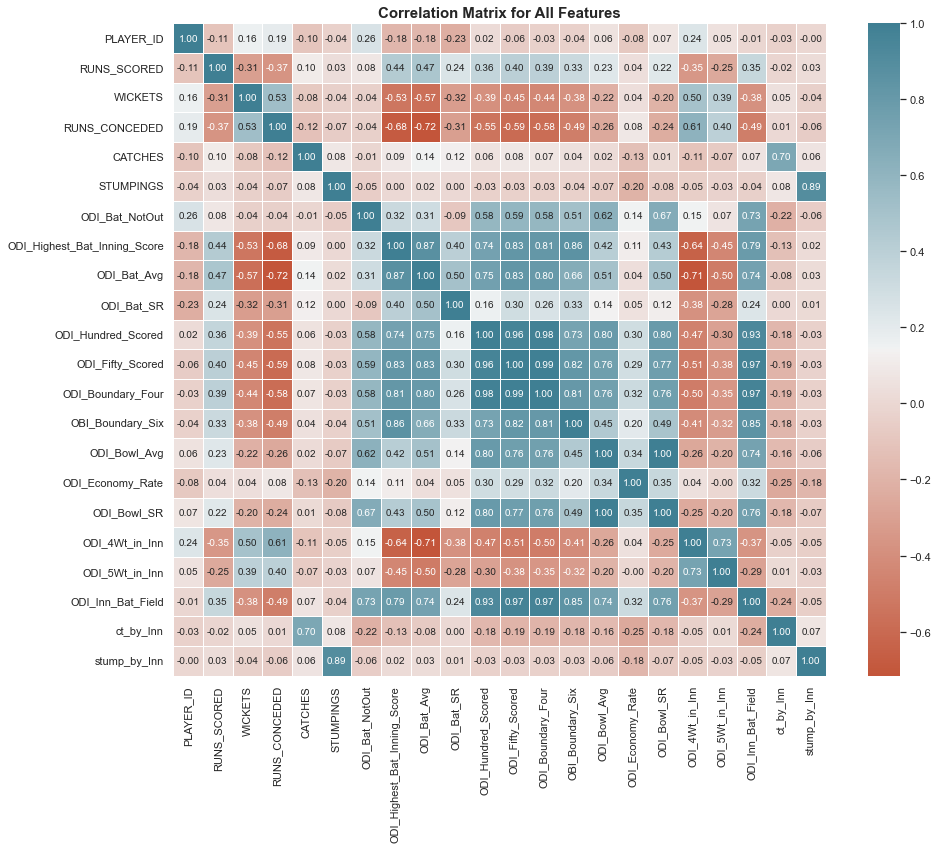

In [43]:
# Correlation matrix for all features
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = final_data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix for All Features', size=15, weight='bold');

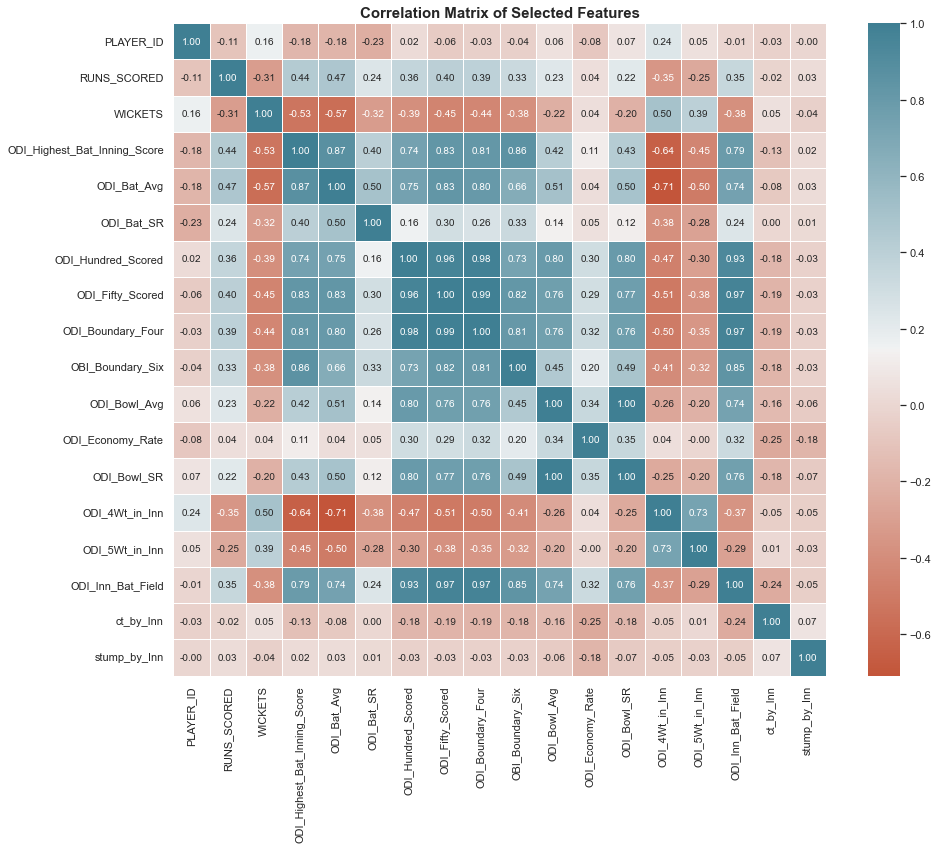

In [44]:
# Correlation matrix of selected features
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = final_data2.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix of Selected Features', size=15, weight='bold');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in DataSet</h2>
</div>


In [45]:
final_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2574
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PLAYER_ID                     2575 non-null   int64  
 1   RUNS_SCORED                   2575 non-null   float64
 2   WICKETS                       2575 non-null   int64  
 3   ODI_Highest_Bat_Inning_Score  2575 non-null   int64  
 4   ODI_Bat_Avg                   2575 non-null   float64
 5   ODI_Bat_SR                    2575 non-null   float64
 6   ODI_Hundred_Scored            2575 non-null   int64  
 7   ODI_Fifty_Scored              2575 non-null   int64  
 8   ODI_Boundary_Four             2575 non-null   int64  
 9   OBI_Boundary_Six              2575 non-null   int64  
 10  ODI_Bowl_Avg                  2575 non-null   float64
 11  ODI_Economy_Rate              2575 non-null   float64
 12  ODI_Bowl_SR                   2575 non-null   float64
 13  ODI

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>

#### * For Target_Variable1 (runs_scored)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Seasonal Autoregressive Integrated Moving Average (SARIMA)</h2>
</div>

In [51]:
# Step 1- Create a Function for Predicting the Cricket Player's Run Score

def train_sarima_model_bat_v1(player_id):

    # Extract 'runs_scored' column against 'player_id' from dataframe
    player_data = final_data2[final_data2['PLAYER_ID'] == player_id][['RUNS_SCORED']]
    
    # Split the data into training and testing sets
    train_size = int(len(player_data) * 0.8)
    train_data = player_data[:train_size]
    test_data = player_data[train_size:]
    
    # Fit a SARIMA model to the training data
    order = (1, 1, 1)  #Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    
    seasonal_order = (0, 1, 4, 12) #Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    
    model = SARIMAX(train_data['RUNS_SCORED']
                    ,order=order
                    ,seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Make predictions on the test data
    predictions = model_fit.predict(start=len(train_data)
                                    ,end=len(train_data) + len(test_data) - 1
                                    ,dynamic=False)
    # Calculate MAE for the predictions
    mae = mean_absolute_error(test_data['RUNS_SCORED'], predictions)
    return model_fit, mae


# Step 2- Define a list of player IDs for which you want to make predictions

player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10
                         ,11,12,13,14,15,16,17,18,19,20
                         ,21,22,23,24,25,26,27,28,29,30]  

# Step 3- Create a dictionary to store predictions
predictions_dict = {'PLAYER_ID': [], 'RUN_SCORED': []}


# Step 4- Train SARIMA models and Make Predictions for each player

for player_id in player_ids_to_predict:

    model, mae = train_sarima_model_bat_v1(player_id)

    predictions = model.forecast(steps=1)  # Predict for October 8, 2023 (1 step ahead)
    
    # Handle predictions less than zero and round decimal values
    predicted_runs = max(0, predictions.iloc[0])
    predicted_runs = round(predicted_runs)

    # Append data to the predictions_dict
    predictions_dict['PLAYER_ID'].append(player_id)
    predictions_dict['RUN_SCORED'].append(predicted_runs)


# Step 5- Create a DataFrame for the final result
result_MODEL1 = pd.DataFrame(predictions_dict)

print("Each player's runs scored has been predicted using Model1:-\n\n")
print('-------------'*9)

Each player's runs scored has been predicted using Model1:-


---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Seasonal Autoregressive Integrated Moving Average (SARIMA) with different combination of parameters</h2>
</div>

In [53]:
# Step 1- Create a Function for Predicting the Cricket Player's Run Score
def train_sarima_model_bat_v2(player_id):

    # Extract 'runs_scored' column against 'player_id' from dataframe
    player_data = final_data2[final_data2['PLAYER_ID'] == player_id][['RUNS_SCORED']]
    
    # Split the data into training and testing sets
    train_size = int(len(player_data) * 0.8)
    train_data = player_data[:train_size]
    test_data = player_data[train_size:]
    
    # Fit a SARIMA model to the training data
    order = (1, 1, 1) #Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    
    seasonal_order = (0, 0, 0, 12)#Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    
    model = SARIMAX(train_data['RUNS_SCORED']
                    ,order=order
                    ,seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Make predictions on the test data
    predictions = model_fit.predict(start=len(train_data)
                                    ,end=len(train_data) + len(test_data) - 1
                                    ,dynamic=False)
    
    # Calculate MAE for the predictions
    mae = mean_absolute_error(test_data['RUNS_SCORED'], predictions)
    return model_fit, mae


# Step 2- Define a list of player IDs for which you want to make predictions
player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10
                         ,11,12,13,14,15,16,17,18,19,20
                         ,21,22,23,24,25,26,27,28,29,30] 

# Step 3- Create a dictionary to store predictions
predictions_dict = {'PLAYER_ID': [], 'RUN_SCORED': []}


# Step 4- Train SARIMA models and Make Predictions for each player

for player_id in player_ids_to_predict:

    model, mae = train_sarima_model_bat_v2(player_id)

    predictions = model.forecast(steps=1)  # Predict for October 8, 2023 (1 step ahead)
    
    # Handle predictions less than zero and round decimal values
    predicted_runs = max(0, predictions.iloc[0])
    predicted_runs = round(predicted_runs)

    # Append data to the predictions_dict
    predictions_dict['PLAYER_ID'].append(player_id)
    predictions_dict['RUN_SCORED'].append(predicted_runs)


# Step 5- Create a DataFrame for the final result
result_MODEL2 = pd.DataFrame(predictions_dict)

print("Each player's runs scored has been predicted using Model2:-\n\n")
print('-------------'*9)

Each player's runs scored has been predicted using Model2:-


---------------------------------------------------------------------------------------------------------------------


In [54]:
# Final Prediction using Ensemble Technique
final_bat_score = (result_MODEL1+result_MODEL2)/2
final_bat_score = round(final_bat_score)

#### * For Target_Variable2 (wickets)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Seasonal Autoregressive Integrated Moving Average (SARIMA)</h2>
</div>

In [56]:
# Step 1- Create Function for Forecasting the Number of Wickets Taken by a Cricket Player

def train_sarima_model_bowl_v1(player_id):

    # Extract 'wickets' column against 'player_id' from dataframe
    player_data = final_data2[final_data2['PLAYER_ID'] == player_id][['WICKETS']]

    # Split the data into training and testing sets
    train_size = int(len(player_data) * 0.8)
    train_data = player_data[:train_size]
    test_data = player_data[train_size:]

    # Fit a SARIMA model to the training data
    order = (1, 1, 1)#Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    
    seasonal_order = (0, 0, 0, 12)#Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    
    model = SARIMAX(train_data['WICKETS']
                    ,order=order
                    ,seasonal_order=seasonal_order)

    model_fit = model.fit()
    
    # Make predictions on the test data
    predictions = model_fit.predict(start=len(train_data)
                                    ,end=len(train_data) + len(test_data) - 1
                                    ,dynamic=False)

    # Calculate MAE for the predictions
    mae = mean_absolute_error(test_data['WICKETS'], predictions)
    return model_fit, mae


# Step 2- Define a list of player IDs for which you want to make predictions
player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10
                         ,11,12,13,14,15,16,17,18,19,20
                         ,21,22,23,24,25,26,27,28,29,30] 


# Step 3- Create a dictionary to store predictions
predictions_dict = {'PLAYER_ID': [], 'WICKETS': []}


# Step 4- Train SARIMA models and Make Predictions for each player
for player_id in player_ids_to_predict:

    model, mae = train_sarima_model_bowl_v1(player_id)

    predictions = model.forecast(steps=1)  # Predict for October 8, 2023 (1 step ahead)
    
    # Handle predictions less than zero and round decimal values
    predicted_wickets = max(0, predictions.iloc[0])
    predicted_wickets = round(predicted_wickets)

    # Append data to the predictions_dict
    predictions_dict['PLAYER_ID'].append(player_id)
    predictions_dict['WICKETS'].append(predicted_wickets)


# Step 5- Create a DataFrame for the final result
bowl_pred_MODEL1 = pd.DataFrame(predictions_dict)

print("Number of wickets taken by a cricket player has been predicted using Model1:-\n\n")
print('-------------'*9)

Number of wickets taken by a cricket player has been predicted using Model1:-


---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Seasonal Autoregressive Integrated Moving Average (SARIMA) with different combination of parameters</h2>
</div>

In [58]:
# Step 1- Create Function for Forecasting the Number of Wickets Taken by a Cricket Player

def train_sarima_model_bowl_v2(player_id):

    # Extract 'wickets' column against 'player_id' from dataframe
    player_data = final_data2[final_data2['PLAYER_ID'] == player_id][['WICKETS']]

    # Split the data into training and testing sets
    train_size = int(len(player_data) * 0.8)
    train_data = player_data[:train_size]
    test_data = player_data[train_size:]

    # Fit a SARIMA model to the training data
    order = (1, 1, 1)#Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    
    seasonal_order = (0, 1, 3, 12)#Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    
    model = SARIMAX(train_data['WICKETS']
                    ,order=order
                    ,seasonal_order=seasonal_order)

    model_fit = model.fit()
    
    # Make predictions on the test data
    predictions = model_fit.predict(start=len(train_data)
                                    ,end=len(train_data) + len(test_data) - 1
                                    ,dynamic=False)

    # Calculate MAE for the predictions
    mae = mean_absolute_error(test_data['WICKETS'], predictions)
    return model_fit, mae


# Step 2- Define a list of player IDs for which you want to make predictions
player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10
                         ,11,12,13,14,15,16,17,18,19,20
                         ,21,22,23,24,25,26,27,28,29,30] 


# Step 3- Create a dictionary to store predictions
predictions_dict = {'PLAYER_ID': [], 'WICKETS': []}


# Step 4- Train SARIMA models and Make Predictions for each player
for player_id in player_ids_to_predict:

    model, mae = train_sarima_model_bowl_v2(player_id)

    predictions = model.forecast(steps=1)  # Predict for October 8, 2023 (1 step ahead)
    
    # Handle predictions less than zero and round decimal values
    predicted_wickets = max(0, predictions.iloc[0])
    predicted_wickets = round(predicted_wickets)

    # Append data to the predictions_dict
    predictions_dict['PLAYER_ID'].append(player_id)
    predictions_dict['WICKETS'].append(predicted_wickets)


# Step 5- Create a DataFrame for the final result
bowl_pred_MODEL2 = pd.DataFrame(predictions_dict)

print("Number of wickets taken by a cricket player has been predicted using Model2:-\n\n")
print('-------------'*9)

Number of wickets taken by a cricket player has been predicted using Model2:-


---------------------------------------------------------------------------------------------------------------------


In [59]:
# Final Prediction using Ensemble Technique
final_bowl_score = (0.65*bowl_pred_MODEL1+0.35*bowl_pred_MODEL2)
final_bowl_score = round(final_bowl_score)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [67]:
sample_format = pd.read_csv (r'C:\Users\PC\Pictures\HE\Cricket_Champion_Hack_Nov23\Final_Work\Format.csv')
sample_format1 = sample_format.drop(['runs','wickets'], axis=1)
bat = final_bat_score['RUN_SCORED']
bowl = final_bowl_score['WICKETS']
final_pred = pd.concat([sample_format1,bat,bowl], axis=1)
# Set "Run_Scored" & "Wickets" as "Zero" for Non-Playing Player in the 08th Oct 23 Match
non_playing_ids = [4,5,9,12,18,23,27,30]
final_pred.loc[final_pred['player_id'].isin(non_playing_ids), ['RUN_SCORED', 'WICKETS']] = 0
final_pred.to_csv(r'C:\Users\PC\Pictures\HE\Cricket_Champion_Hack_Nov23\Final_Work\IND_AUS_Player_Prediction.csv'
                  , index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Actual Score after the clash between India and Australia on Oct 8 2023**

**Best Weighted Average of the RMSE  :-**  8.8974648075

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Reference- Data Collection</h2>
</div>

- Extract "Player Performance Over Time" in One-Day Internationals
- Retrieve "Player Performance History" in the context of One-Day Internationals

#### * Historical Player Performance

In [3]:
# Team INDIA Bowling Statistics
url = 'https://www.espncricinfo.com/records/team/averages-bowling/india-6/one-day-internationals-2?current=2'
Team_India_Bowling_Stat = pd.read_html(url)[0]

# Team INDIA Batting Statistics
url = 'https://www.espncricinfo.com/records/team/averages-batting/india-6/one-day-internationals-2?current=2'
Team_India_Batting_Stat = pd.read_html(url)[0]

# Team AUSTRALIA Bowling Statistics
url = 'https://www.espncricinfo.com/records/team/averages-bowling/australia-2/one-day-internationals-2?current=2'
Team_Australia_Bowling_Stat = pd.read_html(url)[0]

# Team AUSTRALIA Batting Statistics
url = 'https://www.espncricinfo.com/records/team/averages-batting/australia-2/one-day-internationals-2?current=2'
Team_Australia_Batting_Stat = pd.read_html(url)[0]

#### * Historical Match wise Player Performance

In [ ]:
# Rohit Sharma 

url = 'https://stats.espncricinfo.com/ci/engine/player/34102.html?class=2;template=results;type=allround;view=match'

# Read the table into a DataFrame from the URL
R_Sharma = pd.read_html(url)[3]

# create "Player_id" and "Player_Name" in the DataFrame
R_Sharma['Player_id'] = 16
R_Sharma['Player_Name'] = 'Rohit_Sharma'

#-----------------------------------------------------------------------------------------------------------------#

# Hardik Pandya 

url = 'https://stats.espncricinfo.com/ci/engine/player/625371.html?class=2;template=results;type=allround;view=match'

H_Pandya = pd.read_html(url)[3]

H_Pandya['Player_id'] = 17
H_Pandya['Player_Name'] = 'Hardik_Pandya'

#-----------------------------------------------------------------------------------------------------------------#

# Shubman Gill

url = 'https://stats.espncricinfo.com/ci/engine/player/1070173.html?class=2;template=results;type=allround;view=match'

S_Gill = pd.read_html(url)[3]

S_Gill['Player_id'] = 18
S_Gill['Player_Name'] = 'Shubman_Gill'

#-----------------------------------------------------------------------------------------------------------------#

# Virat Kohli 

url = 'https://stats.espncricinfo.com/ci/engine/player/253802.html?class=2;template=results;type=allround;view=match'

V_Kohli = pd.read_html(url)[3]

V_Kohli['Player_id'] = 19
V_Kohli['Player_Name'] = 'Virat_Kohli'

#-----------------------------------------------------------------------------------------------------------------#

# Shreyas Iyer

url = 'https://stats.espncricinfo.com/ci/engine/player/642519.html?class=2;template=results;type=allround;view=match'

S_Iyer = pd.read_html(url)[3]

S_Iyer['Player_id'] = 20
S_Iyer['Player_Name'] = 'Shreyas_Iyer'

#-----------------------------------------------------------------------------------------------------------------#

# KL Rahul 

url = 'https://stats.espncricinfo.com/ci/engine/player/422108.html?class=2;template=results;type=allround;view=match'

KL_Rahul = pd.read_html(url)[3]

KL_Rahul['Player_id'] = 21
KL_Rahul['Player_Name'] = 'KL_Rahul'

#-----------------------------------------------------------------------------------------------------------------#

# Ravindra Jadeja 

url = 'https://stats.espncricinfo.com/ci/engine/player/234675.html?class=2;template=results;type=allround;view=match'

R_Jadeja = pd.read_html(url)[3]

R_Jadeja['Player_id'] = 22
R_Jadeja['Player_Name'] = 'Ravindra_Jadeja'

#-----------------------------------------------------------------------------------------------------------------#

# Shardul Thakur 

url = 'https://stats.espncricinfo.com/ci/engine/player/475281.html?class=2;template=results;type=allround;view=match'

S_Thakur = pd.read_html(url)[3]

S_Thakur['Player_id'] = 23
S_Thakur['Player_Name'] = 'Shardul_Thakur'

#-----------------------------------------------------------------------------------------------------------------#

# Jasprit Bumrah 

url = 'https://stats.espncricinfo.com/ci/engine/player/625383.html?class=2;template=results;type=allround;view=match'

J_Bumrah = pd.read_html(url)[3]

J_Bumrah['Player_id'] = 24
J_Bumrah['Player_Name'] = 'Jasprit_Bumrah'

#-----------------------------------------------------------------------------------------------------------------#

# Mohammed Siraj 

url = 'https://stats.espncricinfo.com/ci/engine/player/940973.html?class=2;template=results;type=allround;view=match'

M_Siraj = pd.read_html(url)[3]

M_Siraj['Player_id'] = 25
M_Siraj['Player_Name'] = 'Mohammed_Siraj'

#-----------------------------------------------------------------------------------------------------------------#

# Kuldeep Yadav 

url = 'https://stats.espncricinfo.com/ci/engine/player/559235.html?class=2;template=results;type=allround;view=match'

K_Yadav = pd.read_html(url)[3]

K_Yadav['Player_id'] = 26
K_Yadav['Player_Name'] = 'Kuldeep_Yadav'

#-----------------------------------------------------------------------------------------------------------------#

# Mohammed Shami 

url ='https://stats.espncricinfo.com/ci/engine/player/481896.html?class=2;template=results;type=allround;view=match'

M_Shami = pd.read_html(url)[3]

M_Shami['Player_id'] = 27
M_Shami['Player_Name'] = 'Mohammed_Shami'

#-----------------------------------------------------------------------------------------------------------------#

# Ravichandran Ashwin 

url = 'https://stats.espncricinfo.com/ci/engine/player/26421.html?class=2;template=results;type=allround;view=match'

R_Ashwin = pd.read_html(url)[3]

R_Ashwin['Player_id'] = 28
R_Ashwin['Player_Name'] = 'Ravichandran_Ashwin'

#-----------------------------------------------------------------------------------------------------------------#

# Ishan Kishan 

url = 'https://stats.espncricinfo.com/ci/engine/player/720471.html?class=2;template=results;type=allround;view=match'

I_Kishan = pd.read_html(url)[3]

I_Kishan['Player_id'] = 29
I_Kishan['Player_Name'] = 'Ishan_Kishan'

#-----------------------------------------------------------------------------------------------------------------#

# Suryakumar Yadav 

url = 'https://stats.espncricinfo.com/ci/engine/player/446507.html?class=2;template=results;type=allround;view=match'

Surya_Yadav = pd.read_html(url)[3]

Surya_Yadav['Player_id'] = 30
Surya_Yadav['Player_Name'] = 'Suryakumar_Yadav'

#-----------------------------------------------------------------------------------------------------------------#

# Pat Cummins 

url = 'https://stats.espncricinfo.com/ci/engine/player/489889.html?class=2;template=results;type=allround;view=match'

Pat_Cummins = pd.read_html(url)[3]

Pat_Cummins['Player_id'] = 1
Pat_Cummins['Player_Name'] = 'Pat_Cummins'

#-----------------------------------------------------------------------------------------------------------------#

# Steve Smith 

url = 'https://stats.espncricinfo.com/ci/engine/player/267192.html?class=2;template=results;type=allround;view=match'

Steve_Smith = pd.read_html(url)[3]

Steve_Smith['Player_id'] = 2
Steve_Smith['Player_Name'] = 'Steve_Smith'

#-----------------------------------------------------------------------------------------------------------------#

# Alex Carey 

url = 'https://stats.espncricinfo.com/ci/engine/player/326434.html?class=2;template=results;type=allround;view=match'

Alex_Carey = pd.read_html(url)[3]

Alex_Carey['Player_id'] = 3
Alex_Carey['Player_Name'] = 'Alex_Carey'

#-----------------------------------------------------------------------------------------------------------------#

# Josh Inglis 

url = 'https://stats.espncricinfo.com/ci/engine/player/662235.html?class=2;template=results;type=allround;view=match'

Josh_Inglis = pd.read_html(url)[3]

Josh_Inglis['Player_id'] = 4
Josh_Inglis['Player_Name'] = 'Josh_Inglis'

#-----------------------------------------------------------------------------------------------------------------#

# Sean Abbott 

url = 'https://stats.espncricinfo.com/ci/engine/player/398666.html?class=2;template=results;type=allround;view=match'

Sean_Abbott = pd.read_html(url)[3]

Sean_Abbott['Player_id'] = 5
Sean_Abbott['Player_Name'] = 'Sean_Abbott'

#-----------------------------------------------------------------------------------------------------------------#

# Marnus Labuschagne

url = 'https://stats.espncricinfo.com/ci/engine/player/787987.html?class=2;template=results;type=allround;view=match'

Marnus_Labuschagne = pd.read_html(url)[3]

Marnus_Labuschagne['Player_id'] = 6
Marnus_Labuschagne['Player_Name'] = 'Marnus_Labuschagne'

#-----------------------------------------------------------------------------------------------------------------#

# Cameron Green 

url = 'https://stats.espncricinfo.com/ci/engine/player/1076713.html?class=2;template=results;type=allround;view=match'

Cameron_Green = pd.read_html(url)[3]

Cameron_Green['Player_id'] = 7
Cameron_Green['Player_Name'] = 'Cameron_Green'

#-----------------------------------------------------------------------------------------------------------------#

# Josh Hazlewood 

url = 'https://stats.espncricinfo.com/ci/engine/player/288284.html?class=2;template=results;type=allround;view=match'

Josh_Hazlewood = pd.read_html(url)[3]

Josh_Hazlewood['Player_id'] = 8
Josh_Hazlewood['Player_Name'] = 'Josh_Hazlewood'

#-----------------------------------------------------------------------------------------------------------------#

# Travis Head 

url = 'https://stats.espncricinfo.com/ci/engine/player/530011.html?class=2;template=results;type=allround;view=match'

Travis_Head = pd.read_html(url)[3]

Travis_Head['Player_id'] = 9
Travis_Head['Player_Name'] = 'Travis_Head'

#-----------------------------------------------------------------------------------------------------------------#

# Mitch Marsh 

url = 'https://stats.espncricinfo.com/ci/engine/player/272450.html?class=2;template=results;type=allround;view=match'

Mitch_Marsh = pd.read_html(url)[3]

Mitch_Marsh['Player_id'] = 10
Mitch_Marsh['Player_Name'] = 'Mitch_Marsh'

#-----------------------------------------------------------------------------------------------------------------#

# Glenn Maxwell 

url = 'https://stats.espncricinfo.com/ci/engine/player/325026.html?class=2;template=results;type=allround;view=match'

Glenn_Maxwell = pd.read_html(url)[3]

Glenn_Maxwell['Player_id'] = 11
Glenn_Maxwell['Player_Name'] = 'Glenn_Maxwell'

#-----------------------------------------------------------------------------------------------------------------#

# Marcus Stoinis 

url ='https://stats.espncricinfo.com/ci/engine/player/325012.html?class=2;template=results;type=allround;view=match'

Marcus_Stoinis = pd.read_html(url)[3]

Marcus_Stoinis['Player_id'] = 12
Marcus_Stoinis['Player_Name'] = 'Marcus_Stoinis'

#-----------------------------------------------------------------------------------------------------------------#

# David Warner 

url = 'https://stats.espncricinfo.com/ci/engine/player/219889.html?class=2;template=results;type=allround;view=match'

David_Warner = pd.read_html(url)[3]

David_Warner['Player_id'] = 13
David_Warner['Player_Name'] = 'David_Warner'

#-----------------------------------------------------------------------------------------------------------------#

# Adam Zampa 

url = 'https://stats.espncricinfo.com/ci/engine/player/379504.html?class=2;template=results;type=allround;view=match'

Adam_Zampa = pd.read_html(url)[3]

Adam_Zampa['Player_id'] = 14
Adam_Zampa['Player_Name'] = 'Adam_Zampa'

#-----------------------------------------------------------------------------------------------------------------#

# Mitchell Starc 

url = 'https://stats.espncricinfo.com/ci/engine/player/311592.html?class=2;template=results;type=allround;view=match'

Mitchell_Starc = pd.read_html(url)[3]

Mitchell_Starc['Player_id'] = 15
Mitchell_Starc['Player_Name'] = 'Mitchell_Starc'